In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터

In [56]:
train = pd.read_csv('train.csv')
subm = pd.read_csv('submission.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 결측값 확인

In [70]:
train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Age

In [58]:
train['Age'] = train['Age'].fillna(28)

### Embarked

In [59]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
train['Embarked'] = train['Embarked'].fillna('S')

## 범주형 데이터 변환

In [61]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


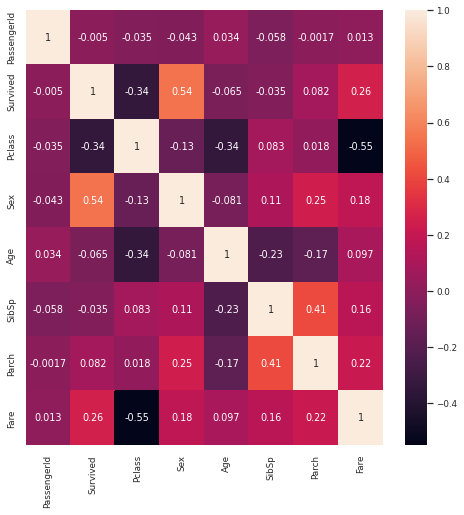

In [63]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

## feature, label 나누기

In [64]:
X_train = train[['Sex', 'Pclass']]
y_train = train['Survived']

In [65]:
X_train2 = train[['Sex', 'Fare']]

In [66]:
X_test = test[['Sex', 'Pclass']]
X_test2 = test[['Sex', 'Fare']]

# 모델

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

lr = LinearRegression()
dt = DecisionTreeClassifier()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
lr.fit(X_train2, y_train)
dt.fit(X_train2, y_train)

DecisionTreeClassifier()

In [47]:
lr_pred = lr.predict(X_test)

In [49]:
dt_pred = dt.predict_proba(X_test)[:, 1]

In [72]:
X_test2.isnull().sum(axis=0)

Sex     0
Fare    1
dtype: int64

In [75]:
X_test2['Fare'].mean()

35.627188489208635

In [76]:
X_test2['Fare'] = X_test2['Fare'].fillna(35)

<ipython-input-76-d4a989e98a78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test2['Fare'] = X_test2['Fare'].fillna(35)


In [77]:
lr_pred2 = lr.predict(X_test2)
dt_pred2 = dt.predict_proba(X_test2)[:, 1]

In [50]:
subm['Survived'] = lr_pred
subm.head()

,PassengerId,Survived
0,892,0.092499
1,893,0.609169
2,894,0.250533
3,895,0.092499
4,896,0.609169


In [51]:
subm.to_csv('logistic_res.csv', index=False)

In [52]:
subm['Survived'] = dt_pred
subm.to_csv('decision_res.csv', index=False)

In [78]:
subm['Survived'] = lr_pred2
subm.to_csv('logistic_res2.csv', index=False)

subm['Survived'] = dt_pred2
subm.to_csv('decision_res2.csv', index=False)